    Introduction to Data Science 
    Laboratory - 03
    Programming Exercise: 03
    Name: Tran Duc Trung
    Student ID: 21280115

### Step 1: Import thư viện

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit

### Step 2: Đọc dữ liệu từ file "Consumo_cerveja.csv" vào biến data

- Tempetura Media: median of temperature in Celsius degree
- Tempetura Minama: min of temperature in Celsius degree
- Tempetura Maxima: max of temperature in Celsius degree
- Precipitacao: precipitation (lượng mưa) in mm
- Final de Semana: whether the weekend or not (0 or 1)
- Consumo de cerveja: the amount of beer consumed in a day (liters)

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/hduc-le/Introduction-to-data-science/main/datasets/Consumo_cerveja.csv')
data

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1,32.307
361,22.64,21.1,26.7,0.0,0,26.095
362,21.68,20.3,24.1,10.3,0,22.309
363,21.38,19.3,22.4,6.3,0,20.467


### Step 3: Exploratory data analysis (EDA)

In [8]:
data.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


- Final de Semana là cột cho thấy có phải mẫu đang quan sát có là cuối tuần hay không. Do đó cột này nên có kiểu là category/phân loại.
- Thực hiện ép kiểu cho cột data["Final de Semana"]

In [10]:
data["Final de Semana"]=data["Final de Semana"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Temperatura Media (C)        365 non-null    float64 
 1   Temperatura Minima (C)       365 non-null    float64 
 2   Temperatura Maxima (C)       365 non-null    float64 
 3   Precipitacao (mm)            365 non-null    float64 
 4   Final de Semana              365 non-null    category
 5   Consumo de cerveja (litros)  365 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 14.9 KB


- Ta có thể thấy memory usage đã được giảm đi tương đối
##### Các biểu đồ mô tả dataset

In [11]:
columns=['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)']

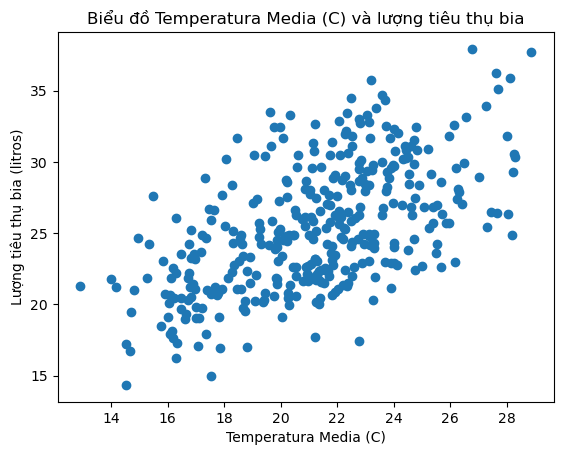

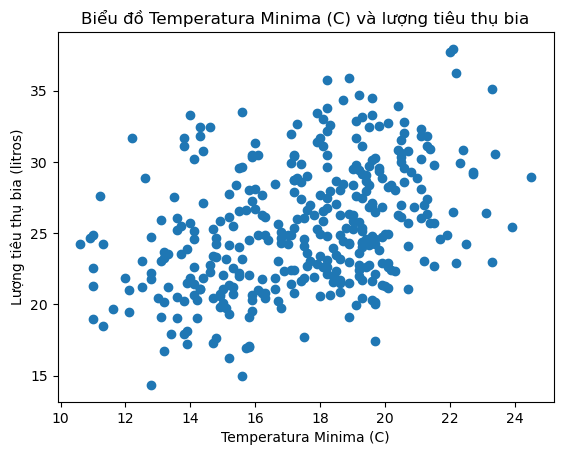

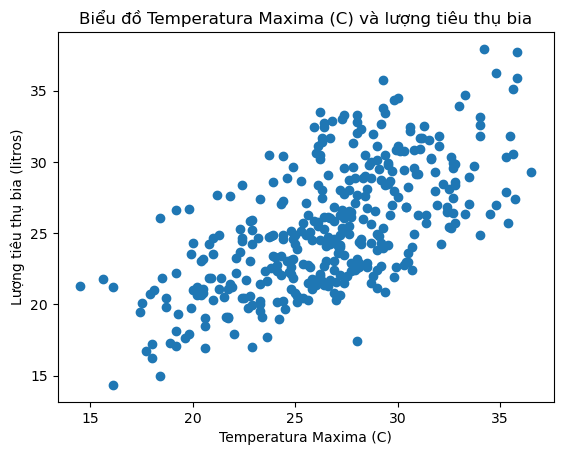

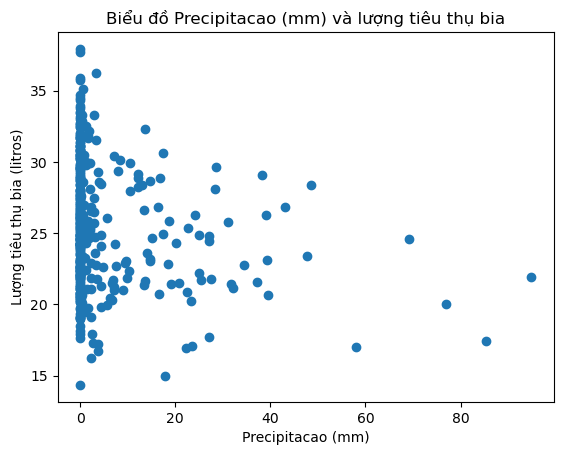

In [12]:
for i in columns:
  plt.scatter(data[i] , data["Consumo de cerveja (litros)"])
  plt.title(f"Biểu đồ {i} và lượng tiêu thụ bia")
  plt.xlabel(i)
  plt.ylabel("Lượng tiêu thụ bia (litros)")
  plt.show()

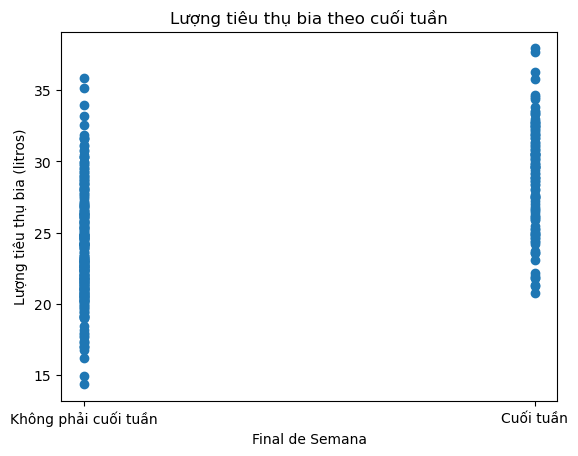

In [13]:
plt.scatter(data['Final de Semana'], data['Consumo de cerveja (litros)'])
plt.title("Lượng tiêu thụ bia theo cuối tuần")
plt.xlabel('Final de Semana')
plt.ylabel("Lượng tiêu thụ bia (litros)")
plt.xticks([0, 1], ['Không phải cuối tuần', 'Cuối tuần'])
plt.show()


### Step 4: Xác định features, label 
- Dataset mà ta đang sử dụng ở bài này được dùng để build models đi dự đoán lượng tiêu thụ bia.
Do đó label sẽ là cột Consumo de cerveja (cuối cùng)

In [14]:
X=np.array(data.iloc[:,:-1])
y=np.array(data.iloc[:,-1])
idx = np.arange(X.shape[0]) # được sử dụng để lưu lại vị trí sau khi chia dataset

### Step 5: Preprocessing data
- Ở bài này ta sẽ sử dụng kĩ thuật Standardization để chuẩn hóa dữ liệu

In [15]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Step 6: Chia dataset cho training và testing

In [16]:
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(X_scaled,y,idx,test_size=0.1,random_state=0)

### Step 7: Build models

#### A. Linear regression

- Loss function của linear regression:
\begin{equation}
\mathcal{L}(\boldsymbol{w}) = \frac{1}{n} \lVert \bar{X} \boldsymbol{w} - \boldsymbol{y} \rVert_2^2
\end{equation}

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [18]:
ln_test_pred=lin_reg.predict(X_test)
ln_train_pred=lin_reg.predict(X_train)

- Lượng tiêu thụ bia dự đoán và thực tế trên tập test

In [19]:
pd.DataFrame({"predict":ln_test_pred,"test":y_test}).head(10)

,predict,test
0,22.274830,21.593
1,28.330718,33.930
2,29.066684,24.968
3,25.423204,29.972
4,24.768582,24.213
5,31.625747,29.188
6,24.710049,21.979
7,27.595896,28.610
8,19.788444,22.217
9,28.840385,29.732


- Trên tập train

In [20]:
pd.DataFrame({"predict":ln_train_pred,"train":y_train}).head(10)

,predict,train
0,18.896386,17.287
1,28.559440,26.362
2,25.376740,22.654
3,26.912417,25.233
4,31.205892,35.781
5,29.331458,32.467
6,29.318963,26.311
7,26.928428,29.130
8,22.268521,20.648
9,29.265023,31.663


#### B. Ridge regression
- Được sử dụng cho các bài toán regression như linear regression nhưng khác với linear, Ridge và Lasso có thể tự điều chỉnh các weight của mình để khắc phục hiện tượng overfitting. Bằng cách thêm 1 thành phần được gọi là regularization term vào trong loss function, regularization của Lasso dùng norm 1, regularization của Ridge dùng norm 2
- Loss function của Ridge regression:
\begin{equation}
\mathcal{L}{\text{Ridge}}(\boldsymbol{w}) = \frac{1}{n} \lVert \bar{X} \boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \alpha \lVert \boldsymbol{w} \rVert_2^2
\end{equation}


- Xác định hệ số alpha cho Ridge:

In [21]:
# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# Khởi tạo pipeline 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1, 10, 1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X_scaled, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ...................model__alpha=1;, score=-6.221 total time=   0.0s
[CV 1/1] END ...................model__alpha=2;, score=-6.211 total time=   0.0s
[CV 1/1] END ...................model__alpha=3;, score=-6.202 total time=   0.0s
[CV 1/1] END ...................model__alpha=4;, score=-6.195 total time=   0.0s
[CV 1/1] END ...................model__alpha=5;, score=-6.190 total time=   0.0s
[CV 1/1] END ...................model__alpha=6;, score=-6.184 total time=   0.0s
[CV 1/1] END ...................model__alpha=7;, score=-6.180 total time=   0.0s
[CV 1/1] END ...................model__alpha=8;, score=-6.176 total time=   0.0s
[CV 1/1] END ...................model__alpha=9;, score=-6.173 total time=   0.0s
Pipeline(steps=[('model', Ridge(alpha=9))])
Best core:  -6.172728617591699


In [22]:
ridge_reg=Ridge(alpha=9)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=9)

In [23]:
ridge_test_pred=ridge_reg.predict(X_test)
ridge_train_pred=ridge_reg.predict(X_train)

- Lượng tiêu thụ bia dự đoán (bằng Ridge) và thực tế trên tập test

In [24]:
pd.DataFrame({"predict":ridge_test_pred,"test":y_test}).head(10)

,predict,test
0,22.236463,21.593
1,28.564977,33.930
2,29.008157,24.968
3,25.472404,29.972
4,24.613113,24.213
5,31.524867,29.188
6,24.776224,21.979
7,27.630485,28.610
8,19.706619,22.217
9,28.460379,29.732


- Trên tập train

In [25]:
pd.DataFrame({"predict":ridge_train_pred,"train":y_train}).head(10)

,predict,train
0,19.077344,17.287
1,28.567155,26.362
2,25.333269,22.654
3,26.666407,25.233
4,31.118398,35.781
5,29.186506,32.467
6,29.476024,26.311
7,26.911260,29.130
8,22.285326,20.648
9,29.218802,31.663


#### C. Lasso regression

- Loss function của Lasso regression:
\begin{equation}
\mathcal{L}{\text{Lasso}}(\boldsymbol{w}) = \frac{1}{n} \lVert \bar{X} \boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \alpha \lVert \boldsymbol{w} \rVert_1
\end{equation}

- Xác định hệ số alpha cho Lasso

In [26]:
# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# Khởi tạo pipeline 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('model', Lasso())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1, 10, 1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X_scaled, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ...................model__alpha=1;, score=-7.728 total time=   0.0s
[CV 1/1] END ..................model__alpha=2;, score=-11.402 total time=   0.0s
[CV 1/1] END ..................model__alpha=3;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=4;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=5;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=6;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=7;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=8;, score=-15.492 total time=   0.0s
[CV 1/1] END ..................model__alpha=9;, score=-15.492 total time=   0.0s
Pipeline(steps=[('model', Lasso(alpha=1))])
Best core:  -7.727979588549325


In [27]:
lasso_reg=Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [28]:
lasso_test_pred=lasso_reg.predict(X_test)
lasso_train_pred=lasso_reg.predict(X_train)

- Lượng tiêu thụ bia dự đoán (bằng Lasso) và thực tế trên trập test

In [29]:
pd.DataFrame({"predict":lasso_test_pred,"test":y_test}).head(10)

,predict,test
0,24.632919,21.593
1,27.231814,33.930
2,27.971454,24.968
3,25.369272,29.972
4,25.152698,24.213
5,29.444161,29.188
6,24.849493,21.979
7,26.368801,28.610
8,22.510487,22.217
9,27.535019,29.732


- Trên tập train

In [30]:
pd.DataFrame({"predict":lasso_train_pred,"train":y_train}).head(10)

,predict,train
0,21.124410,17.287
1,27.361759,26.362
2,25.282643,22.654
3,25.935652,25.233
4,28.707807,35.781
5,27.451675,32.467
6,27.881538,26.311
7,26.322201,29.130
8,24.719549,20.648
9,27.408360,31.663


### Step 8: Đánh giá models

In [31]:
print("________________________LinearRegression________________________________")
print("MSE test: ",mean_squared_error(y_test,ln_test_pred))
print("MSE train: ",mean_squared_error(y_train,ln_train_pred))
print("RMSE test: ",sqrt(mean_squared_error(y_test,ln_test_pred)))
print("RMSE train: ",sqrt(mean_squared_error(y_train,ln_train_pred)))
print("MAE test: ",mean_absolute_error(y_test,ln_test_pred))
print("MAE train: ",mean_absolute_error(y_train,ln_train_pred))
print("R2 score test: ",r2_score(y_test,ln_test_pred))
print("R2 score train: ",r2_score(y_train,ln_train_pred))
print("________________________RidgeRegression________________________________")
print("MSE test: ",mean_squared_error(y_test,ridge_test_pred))
print("MSE train: ",mean_squared_error(y_train,ridge_train_pred))
print("RMSE test: ",sqrt(mean_squared_error(y_test,ridge_test_pred)))
print("RMSE train: ",sqrt(mean_squared_error(y_train,ridge_train_pred)))
print("MAE test: ",mean_absolute_error(y_test,ridge_test_pred))
print("MAE train: ",mean_absolute_error(y_train,ridge_train_pred))
print("R2 score test: ",r2_score(y_test,ridge_test_pred))
print("R2 score train: ",r2_score(y_train,ridge_train_pred))
print("______________________________LassoRegression_____________________________")
print("MSE test: ",mean_squared_error(y_test,lasso_test_pred))
print("MSE train: ",mean_squared_error(y_train,lasso_train_pred))
print("RMSE test: ",sqrt(mean_squared_error(y_test,lasso_test_pred)))
print("RMSE train: ",sqrt(mean_squared_error(y_train,lasso_train_pred)))
print("MAE test: ",mean_absolute_error(y_test,lasso_test_pred))
print("MAE train: ",mean_absolute_error(y_train,lasso_train_pred))
print("R2 score test: ",r2_score(y_test,lasso_test_pred))
print("R2 score train: ",r2_score(y_train,lasso_train_pred))

________________________LinearRegression________________________________
MSE test:  6.234177382917653
MSE train:  5.261946229206073
RMSE test:  2.4968334712026055
RMSE train:  2.2938932471250864
MAE test:  2.138321748553854
MAE train:  1.9452805246460352
R2 score test:  0.5765220997163802
R2 score train:  0.733406534275199
________________________RidgeRegression________________________________
MSE test:  6.1727286175917
MSE train:  5.288140064088649
RMSE test:  2.484497659003063
RMSE train:  2.2995956305595664
MAE test:  2.1277217982963257
MAE train:  1.9502551419266336
R2 score test:  0.5806962180509914
R2 score train:  0.7320794387638063
______________________________LassoRegression_____________________________
MSE test:  7.72797958854933
MSE train:  7.796618829276143
RMSE test:  2.779924385401396
RMSE train:  2.7922426164780423
MAE test:  2.2337738846476847
MAE train:  2.2815364709782617
R2 score test:  0.47505045676741364
R2 score train:  0.6049888113460298


- Qua những đánh giá ở trên ta thấy rằng trong bài toán và dataset này việc sử dụng Linear regression và Ridge regression sẽ cho ra model tốt hơn Lasso regression. Chi tiết thì ở 2 models trên các đánh giá về MSE, RMSE, MAE đều có giá trị nhỏ hơn của Lasso, còn về đánh giá R2 score 2 models trên cũng tốt hơn Lasso khi mà đều cho kết quả gần với 1 hơn
- Còn giải thích về việc sao ở dataset này Ridge và Linear đều cho model tương đồng nhau, thì đó là do dataset còn đơn giản, số lượng feature ít và các feature ít sự tương quan với nhau (hệ số tương quan nhỏ). Nếu như càng sử dụng thêm nhiều polynomial feature thì 2 model này sẽ cho thấy sự khác biết, khi mà càng có nhiều polynomial feature Linear càng dễ bị overfitting, còn Ridge thì lại có khả năng tự điều chỉnh hệ số để giảm thiểu overfitting
- ----> Trong bài toán này việc sử dụng Linear regression là đủ, không nhất thiết phải dùng Ridge regression, để model giảm bớt tính toán cũng như chi phí và thời gian chạy